# Relax and take a bike ride! - Part II

This is the part II of the Ecobici project. Here I will carry out the Exploratory Data Analysis of the clean dataset of part I.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from branca.element import Figure
import osmnx as ox
import networkx as nx
from folium.plugins import TimestampedGeoJson

In [2]:
df = pd.read_csv(r"ecobici_2019_v1.csv")

#### Data Summary

In [3]:
df.sample(5)

id_usuario fecha_origen_recorrido  id_estacion_origen  \
28683        493932    2019-01-08 14:41:46                  30   
5945155      255177    2019-09-07 09:57:00                 104   
3832316      246190    2019-10-03 08:20:00                  92   
1509171       70598    2019-06-13 00:26:38                 185   
1606413      153393    2019-06-18 21:15:21                 134   

         capacidad_estacion_origen  lat_estacion_origen  long_estacion_origen  \
28683                         20.0           -34.590394            -58.397378   
5945155                       30.0           -34.587617            -58.455212   
3832316                       20.0           -34.631644            -58.405339   
1509171                       12.0           -34.631330            -58.421770   
1606413                       20.0           -34.611801            -58.415053   

         duracion_recorrido fecha_destino_recorrido  id_estacion_destino  \
28683                 683.0     2019-01-08 14:53:09                   89   
5945155               343.0     2019-09-07 10:03:00                  395   
3832316               376.0     2019-10-03 08:26:00                  226   
1509171              2635.0     2019-06-13 01:10:33                  401   
1606413              1098.0     2019-06-18 21:33:39                  110   

         capacidad_estacion_destino  lat_estacion_destino  \
28683                          20.0            -34.582472   
5945155                        16.0            -34.596804   
3832316                        20.0            -34.633335   
1509171                        20.0            -34.634762   
1606413                        20.0            -34.601738   

         long_estacion_destino  
28683               -58.405313  
5945155             -58.453569  
3832316             -58.413226  
1509171             -58.479592  
1606413             -58.415434

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225057 entries, 0 to 6225056
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_usuario                  int64  
 1   fecha_origen_recorrido      object 
 2   id_estacion_origen          int64  
 3   capacidad_estacion_origen   float64
 4   lat_estacion_origen         float64
 5   long_estacion_origen        float64
 6   duracion_recorrido          float64
 7   fecha_destino_recorrido     object 
 8   id_estacion_destino         int64  
 9   capacidad_estacion_destino  float64
 10  lat_estacion_destino        float64
 11  long_estacion_destino       float64
dtypes: float64(7), int64(3), object(2)
memory usage: 569.9+ MB


## Feature Engineering

In [5]:
df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'])
df['fecha_destino_recorrido'] = pd.to_datetime(df['fecha_destino_recorrido'])

Let us create some features for a future analysis.

In [6]:
df['mes'] = df['fecha_origen_recorrido'].dt.month
df['dia'] = df['fecha_origen_recorrido'].dt.day
df['dia_semana'] = df['fecha_origen_recorrido'].dt.dayofweek
df['hora'] = df['fecha_origen_recorrido'].dt.hour

## Exploratory Data Analysis

### Number of trips by month

Let us look at the evolution of the number of bike trips by month.

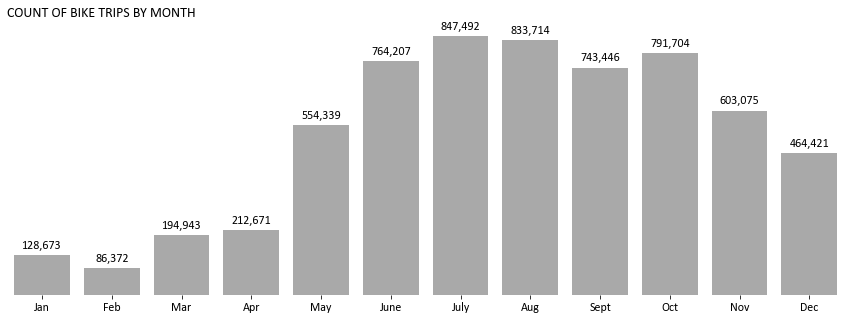

In [7]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='mes', data=df, color='darkgray')
ax.set_title("COUNT OF BIKE TRIPS BY MONTH", fontsize=14, loc='left', y=1, fontname='Calibri')

ax.set(xlabel=None)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month, fontsize=12, fontname='Calibri')

ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False) 

for p in ax.patches:
    ax.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   fontname = 'Calibri',
                   xytext = (0, +10), 
                   textcoords = 'offset points')

plt.show()

Teambici started its operation at the end of february 2019. So, it makes sense that in the firt quater of the year the count of number of trips were low. For a better analysis of the situation we need to look at the number of stations availables at those month.

### Number of stations available by month
Let us look at the evolution of the number of station by month. 

In [8]:
station_by_month = df.groupby('mes')['id_estacion_origen'].nunique()
station_by_month = station_by_month.reset_index()

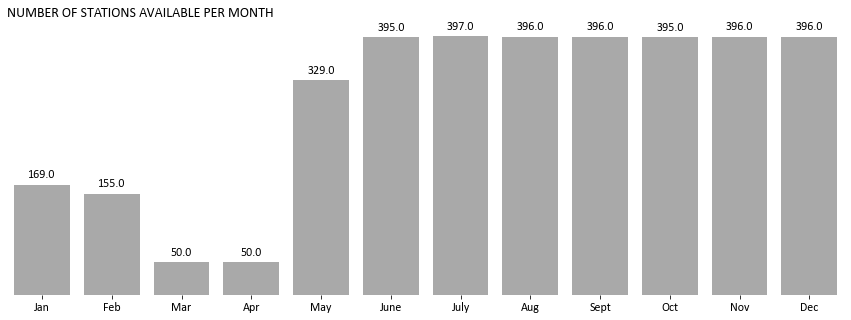

In [9]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='mes', y='id_estacion_origen', data=station_by_month, color='darkgray')
ax.set_title("NUMBER OF STATIONS AVAILABLE PER MONTH", fontsize=14, loc='left', y=1, fontname='Calibri')

ax.set(xlabel=None)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month, fontsize=12, fontname='Calibri')

ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False) 

for p in ax.patches:
    ax.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   fontname = 'Calibri',
                   xytext = (0, +10), 
                   textcoords = 'offset points')

From the plot, we can see that in May the number of station increased by 95%. In the month of March and April the number of stations available were low because of its renovation.     

### Number of users by month

Let us look at the number of users by month.

In [10]:
user_by_month = df.groupby('mes')['id_usuario'].nunique()
user_by_month = user_by_month.reset_index()

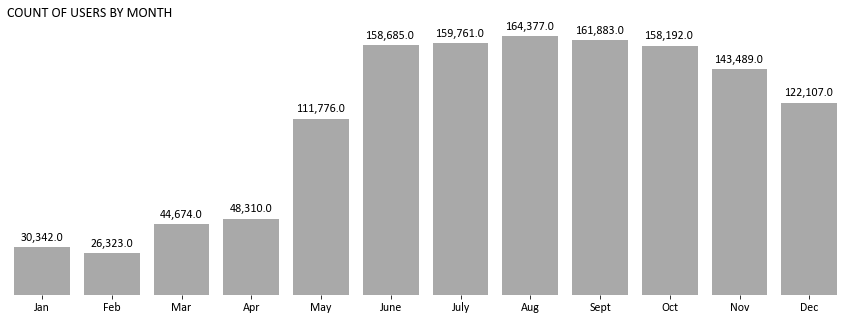

In [11]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='mes', y='id_usuario', data=user_by_month, color='darkgray')
ax.set_title("COUNT OF USERS BY MONTH", fontsize=14, loc='left', y=1, fontname='Calibri')

ax.set(xlabel=None)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month, fontsize=12, fontname='Calibri')

ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False) 

for p in ax.patches:
    ax.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   fontname = 'Calibri',
                   xytext = (0, +10), 
                   textcoords = 'offset points')

With the expantion of Ecobici, the number of users increased.

### Number of trips by user

Let us look the distribution of trips per user by month.

In [12]:
rides_per_user_month = df.groupby(['mes','id_usuario'])['fecha_origen_recorrido'].count()
rides_per_user_month = rides_per_user_month.reset_index()

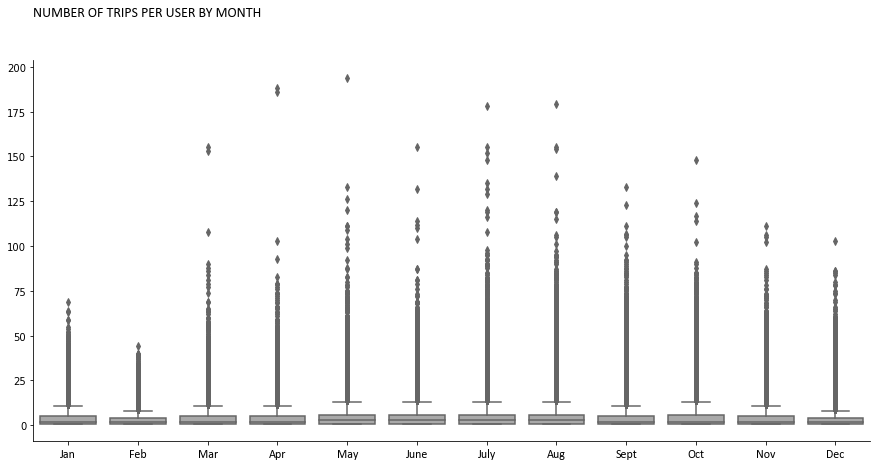

In [13]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x='mes', y='fecha_origen_recorrido', data=rides_per_user_month, color='darkgray')

ax.set_title("NUMBER OF TRIPS PER USER BY MONTH", fontsize=14, loc='left', y=1.1, fontname='Calibri')
ax.set(ylabel=None)

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month, fontsize=12, fontname='Calibri')
ax.set(xlabel=None)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Despite being a greater number of station and bicicles available, the number of trip per user seams not varied by month. Let us take a closer look.

In [14]:
median_rides = rides_per_user_month.groupby('mes')['fecha_origen_recorrido'].median()
median_rides = median_rides.reset_index()
median_rides.rename(columns={'mes':'Month','fecha_origen_recorrido':'Number of rides per user'}, inplace=True)
median_rides

Month  Number of rides per user
0       1                         2
1       2                         2
2       3                         2
3       4                         2
4       5                         3
5       6                         3
6       7                         3
7       8                         3
8       9                         2
9      10                         2
10     11                         2
11     12                         2

### Evolution of number of trips per day and hour

Let us look at the number of trips by day and hour 

In [15]:
trip_day_hour = df.groupby(['dia_semana','hora'])['id_estacion_origen'].count()
trip_day_hour = trip_day_hour.reset_index()
trip_day_hour.rename(columns={'id_estacion_origen':'count_trip'}, inplace=True)

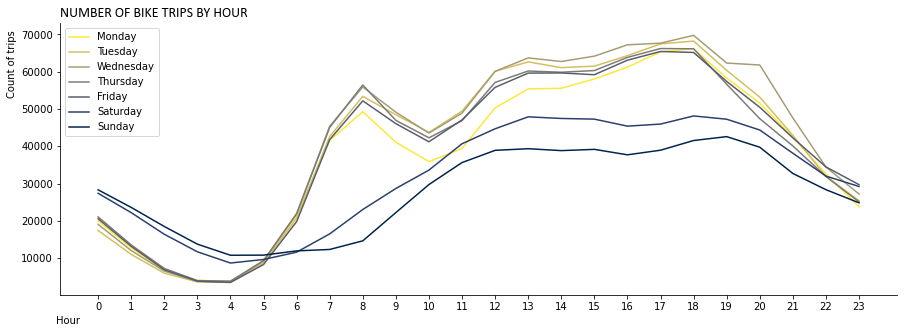

In [16]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x='hora', y='count_trip', hue='dia_semana', data=trip_day_hour, palette='cividis_r')
ax.set_title("NUMBER OF BIKE TRIPS BY HOUR", fontsize=14, loc='left', y=1, fontname='Calibri')

plt.ylabel('Count of trips', y =0.85)
plt.xlabel('Hour', x =0.01)
ax.set_xticks(np.arange(0, 24,1))

plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


There are more users on weekdays than weekends. The peaks on weekdays match the subway rush hour. 

### Use of station

Let us look at the most used stations and its location.

In [17]:
station = df.groupby(['id_estacion_origen','lat_estacion_origen','long_estacion_origen'])['fecha_origen_recorrido'].count()
station = station.reset_index()
station.rename(columns={'fecha_origen_recorrido':'station_count'}, inplace=True)

In [18]:
top_ten = station.sort_values('station_count', ascending=False).reset_index(drop=True).head(10)
top_ten.head()

id_estacion_origen  lat_estacion_origen  long_estacion_origen  \
0                 175           -34.626741            -58.380935   
1                  14           -34.577424            -58.426387   
2                   9           -34.585443            -58.407741   
3                  29           -34.607941            -58.433557   
4                  69           -34.596101            -58.404609   

   station_count  
0          84555  
1          58858  
2          48176  
3          46359  
4          44094

In [19]:
m = folium.Map(location=[-34.59723, -58.40723],zoom_start=13,min_zoom=13,max_zoom=13)

fig=Figure(width=650,height=550)
fig.add_child(m)

for i in range(0,len(top_ten)):
    folium.Circle(
      location=[top_ten.iloc[i]['lat_estacion_origen'],top_ten.iloc[i]['long_estacion_origen']],
      radius=top_ten.iloc[i]['station_count']/150,
      popup=top_ten.iloc[i]['station_count'],
      line_color='#3186cc',
      fill=True,
      fill_color='#3186cc').add_to(m)

m

The mayority of the top ten of most used stations are closed to a subway or train station.

Now let us see the traffic by station. 

In [20]:
day_subset = df[(df['mes']==8)&(df['dia']==12)&(df['id_estacion_origen']!=df['id_estacion_destino'])].dropna()

In [21]:
departure_hourly = day_subset.groupby(['hora','id_estacion_origen'])['fecha_origen_recorrido'].count().reset_index()
arrival_hourly = day_subset.groupby(['hora','id_estacion_destino'])['fecha_origen_recorrido'].count().reset_index()

In [22]:
departure_hourly.rename(columns={'fecha_origen_recorrido':'Departure_count'}, inplace=True)
arrival_hourly.rename(columns={'fecha_origen_recorrido':'Arrival_count'}, inplace=True)

In [23]:
trip_counts = pd.merge(departure_hourly, arrival_hourly, how='outer', left_on=['hora','id_estacion_origen'], right_on=['hora','id_estacion_destino'])

In [24]:
trip_counts.fillna({'Departure_count':0,'Arrival_count':0},inplace=True)

In [25]:
trip_counts.fillna({'id_estacion_origen':9999,'id_estacion_destino':9999},inplace=True)

In [26]:
for i in range(0,len(trip_counts)):
    if trip_counts.iloc[i,1]==9999:
        trip_counts.iloc[i,1]=trip_counts.iloc[i]['id_estacion_destino']
    elif trip_counts.iloc[i,3]==9999:
        trip_counts.iloc[i,3]=trip_counts.iloc[i]['id_estacion_origen'] 
    else:
        continue    

In [27]:
station_info_d = day_subset.groupby('id_estacion_origen').first().reset_index()
station_info_d = station_info_d.loc[:,['id_estacion_origen','capacidad_estacion_origen','lat_estacion_origen','long_estacion_origen']]

In [28]:
trip_counts = pd.merge(trip_counts, station_info_d, how='left', left_on='id_estacion_origen', right_on='id_estacion_origen')

In [29]:
trip_counts['traffic'] = (trip_counts['Arrival_count'] - trip_counts['Departure_count'])

In [30]:
trip_counts.head()

hora  id_estacion_origen  Departure_count  id_estacion_destino  \
0     0                 6.0              3.0                  6.0   
1     0                 7.0              1.0                  7.0   
2     0                 8.0              1.0                  8.0   
3     0                 9.0              3.0                  9.0   
4     0                11.0              2.0                 11.0   

   Arrival_count  capacidad_estacion_origen  lat_estacion_origen  \
0            3.0                       20.0           -34.628526   
1            1.0                       16.0           -34.606498   
2            1.0                       24.0           -34.609422   
3            2.0                       24.0           -34.585443   
4            1.0                       20.0           -34.601176   

   long_estacion_origen  traffic  
0            -58.369758      0.0  
1            -58.381098      0.0  
2            -58.389336      0.0  
3            -58.407741     -1.0  
4            -58.385079     -1.0

In [31]:
for i in range(0,len(trip_counts)):
    trip_counts.iloc[i,0] = '2019-08-12 '+str(trip_counts.iloc[i,0])+':00:00'

In [32]:
features = []
for item, row in trip_counts.iterrows():
    if row['traffic']>0:
        color="#E37222" # tangerine
    else:
        color="#0A8A9F" # teal
    
    feature = {'type': 'Feature',
               'geometry': {
                'type':'Point', 
                'coordinates':[row['long_estacion_origen'],row['lat_estacion_origen']]},
                'properties': {
                'time': row['hora'],
                'style': {'color' : color},
                'icon': 'circle',
                'iconstyle':{
                    'fillColor': color,
                    'fillOpacity': 0.5,
                    'stroke': 'true',
                    'weight':1,
                    'radius': np.absolute(row['traffic']*2.5)}}}
    features.append(feature)

In [33]:
m1 = folium.Map(location=[-34.59723, -58.40723],zoom_start=12,min_zoom=12,max_zoom=12, tiles='CartoDB Positron')


TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features},
    auto_play=False,
    loop=False,
    duration = 'PT1M',
    transition_time = 2000,
    period='PT1H').add_to(m1)

In [34]:
m1

### ¿Where are the people going?

Let us try to simulate what are the routes most used by users.

In [35]:
dur_sub = day_subset[day_subset['duracion_recorrido']<=3600]

In [36]:
top_10_sub = dur_sub['id_estacion_origen'].value_counts().head(10).tolist()

In [37]:
station_sub = dur_sub[dur_sub['id_estacion_origen'].isin(top_10_sub)]

In [38]:
G = ox.graph_from_place('Buenos Aires, Argentina')

In [39]:
lat_long = []
time_series = []

for i in range(0,len(station_sub)):
    orig_node = ox.get_nearest_node(G, (station_sub.iloc[i]['lat_estacion_origen'], station_sub.iloc[i]['long_estacion_origen']))
    dest_node = ox.get_nearest_node(G, (station_sub.iloc[i]['lat_estacion_destino'], station_sub.iloc[i]['long_estacion_destino']))
    try:
        route = nx.shortest_path(G, orig_node, dest_node, weight='length')
        time = pd.date_range(station_sub.iloc[i,1], station_sub.iloc[i,7], periods=len(route))
        time_series.append(time)
        for x in route:
            lat_long.append([G.nodes[x]['y'],G.nodes[x]['x']])     
    except nx.NetworkXNoPath:
        continue

In [40]:
serie = []
for i in time_series:
    for x in i:
        serie.append(x)

In [41]:
df_drive = pd.DataFrame(list(zip(lat_long, serie)), columns =['coordinates', 'time'])

In [42]:
df_drive['time'] = df_drive['time'].dt.strftime("%Y-%m-%d %H:%M")

In [43]:
df_drive.sort_values('time', inplace=True)

In [44]:
df_drive.reset_index(drop=True, inplace=True)

In [45]:
df_drive['time'] = pd.to_datetime(df_drive['time'])

In [46]:
df_drive['hour'] = df_drive['time'].dt.hour

In [47]:
df_drive['minute'] = df_drive['time'].dt.minute

In [48]:
df_drive.tail()

coordinates                time  hour  minute
28462  [-34.5593896, -58.4617606] 2019-08-13 00:25:00     0      25
28463  [-34.5586669, -58.4624025] 2019-08-13 00:25:00     0      25
28464  [-34.5579137, -58.4630631] 2019-08-13 00:25:00     0      25
28465  [-34.5571792, -58.4636925] 2019-08-13 00:25:00     0      25
28466  [-34.5566986, -58.4627657] 2019-08-13 00:26:00     0      26

In [49]:
lat_long_list = []
for i in range(0,24):
    temp=[]
    for index, instance in df_drive[df_drive['hour']==i].iterrows():
        temp.append(instance['coordinates'])
    lat_long_list.append(temp)

In [50]:
from folium.plugins import HeatMapWithTime

In [51]:
m2 = folium.Map(location=[-34.59723, -58.40723],zoom_start=13,min_zoom=13,max_zoom=13, tiles='CartoDB Positron')

In [52]:
HeatMapWithTime(lat_long_list,radius=10,auto_play=False,position='topright').add_to(m2)

In [53]:
m2